In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
insurance = pd.read_csv('Insurance Dataset.csv')

In [3]:
insurance.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000


In [4]:
insurance.shape

(100, 5)

In [5]:
insurance.Age.mean()

46.11

In [6]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
Premiums Paid,100.0,12542.250000,6790.731666,2800.00000,6975.000000,11825.000000,15475.00000,29900.00000
Age,100.0,46.110000,13.887641,23.00000,34.000000,45.000000,54.50000,82.00000
Days to Renew,100.0,120.400000,88.055767,1.00000,56.000000,89.000000,186.50000,321.00000
Claims made,100.0,12578.993367,13695.906762,1978.26087,5220.648735,8386.043907,14670.88952,99676.74419
Income,100.0,102250.000000,43517.237964,28000.00000,65125.000000,102250.000000,139375.00000,176500.00000


In [7]:
insurance.isna().sum().any()

False

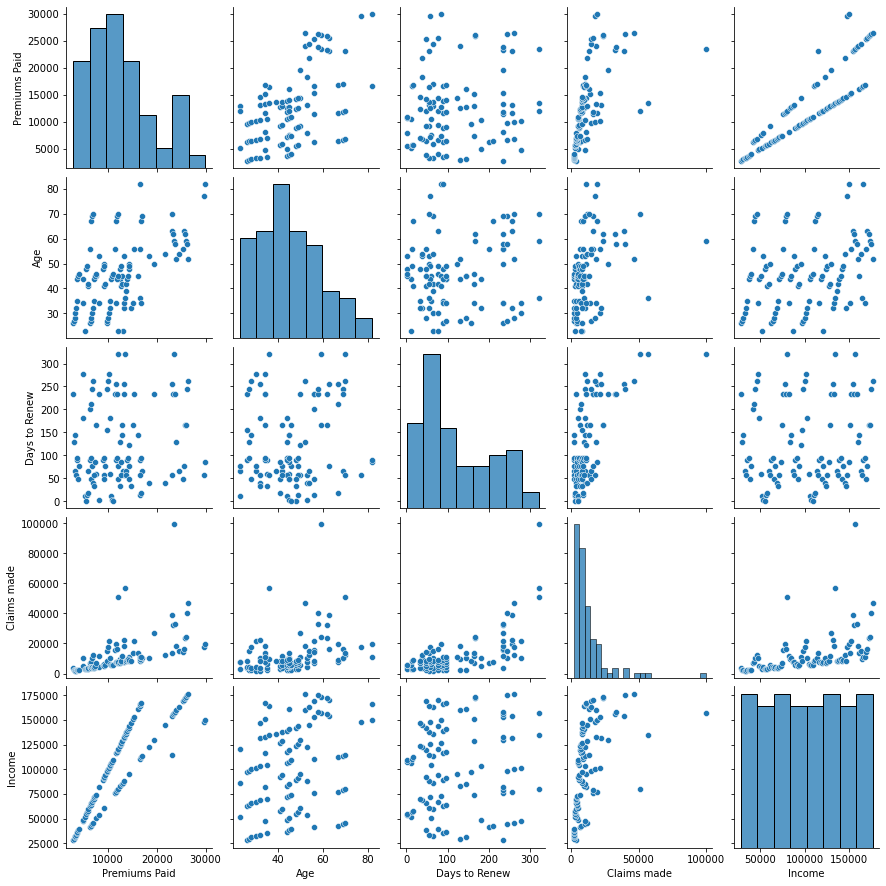

In [8]:

sns.pairplot(insurance)


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

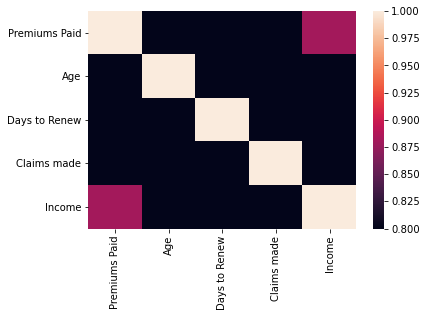

In [9]:
sns.heatmap(insurance.corr() , 0.8)

here we can see relationship between premium paid and income

Text(0.5, 1.0, 'Plot')

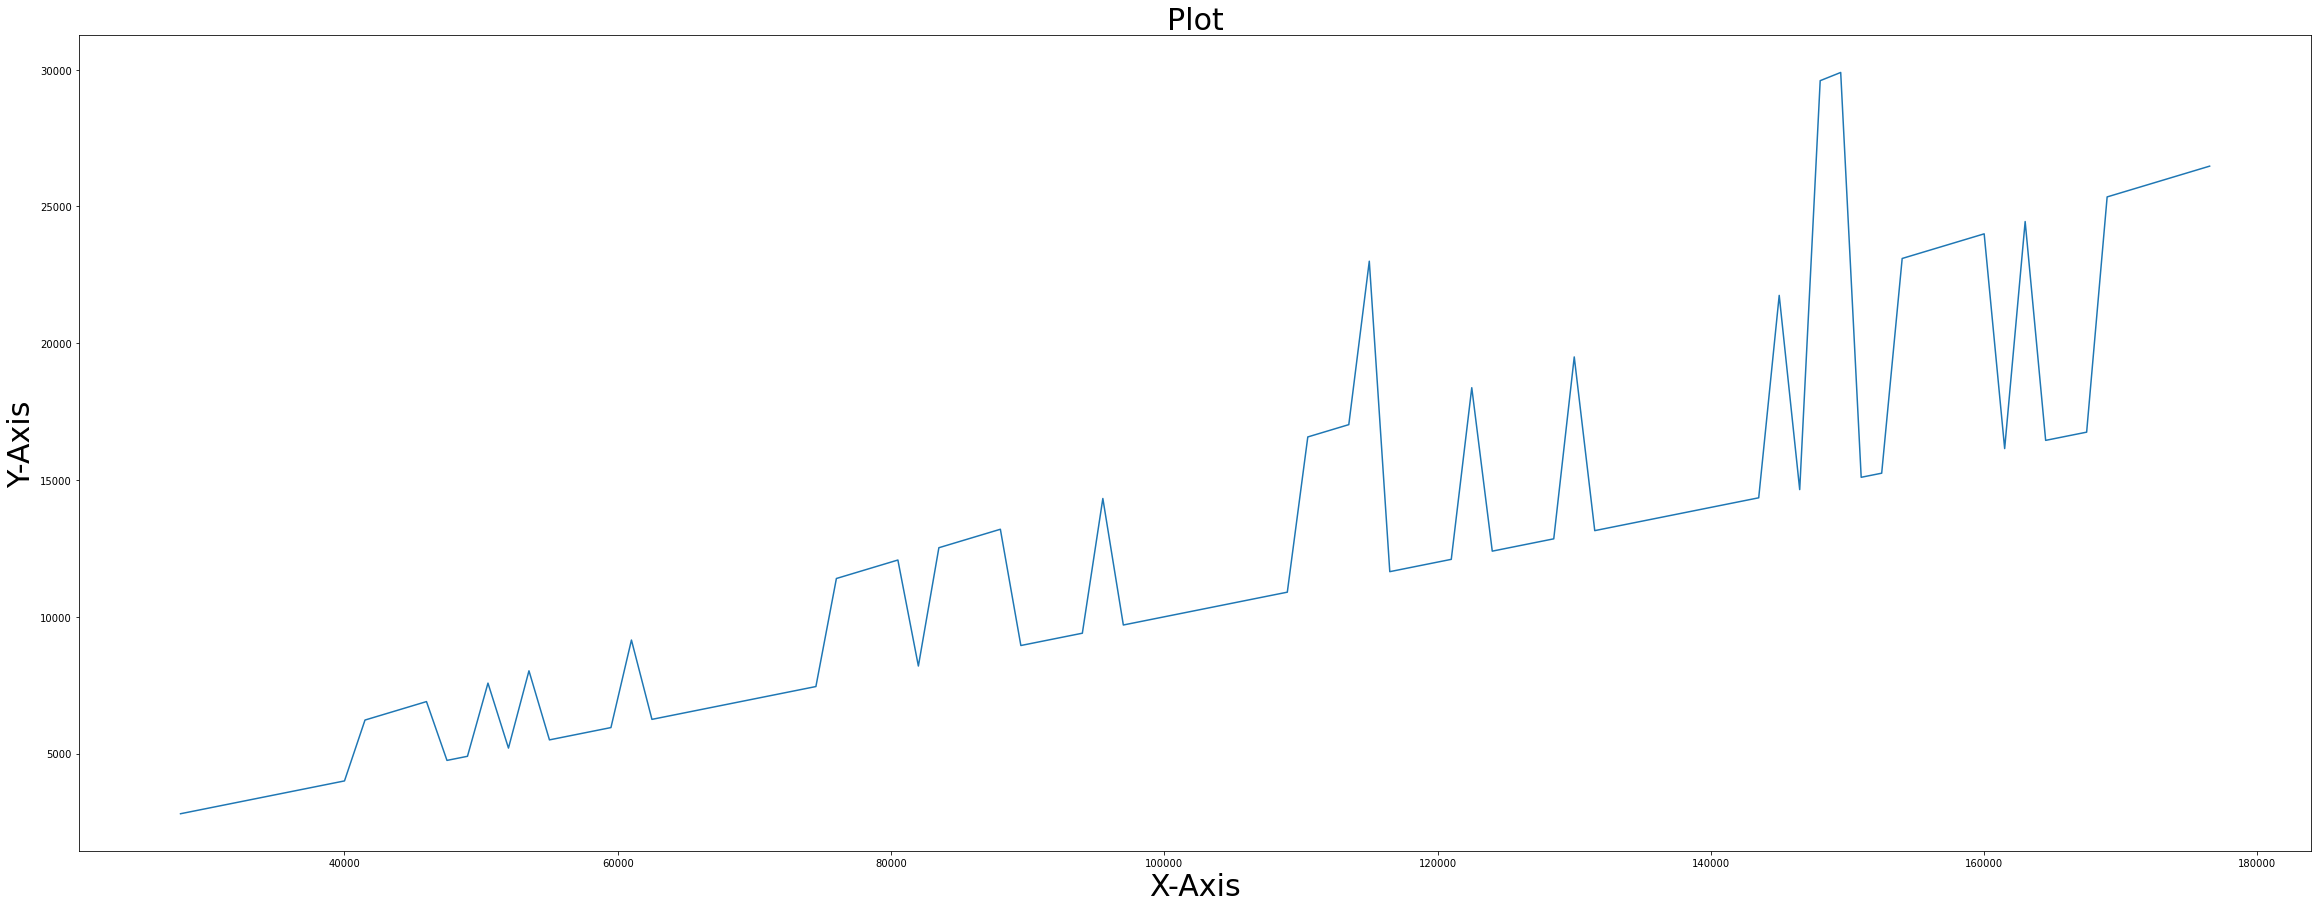

In [10]:
fig, ax = plt.subplots(figsize =(40,15))
ax = sns.lineplot(x= 'Income', y='Premiums Paid',data = insurance)
ax.set_xlabel("X-Axis", fontsize = 30)
ax.set_ylabel("Y-Axis", fontsize = 30)
ax.set_title("Plot", fontsize = 30)


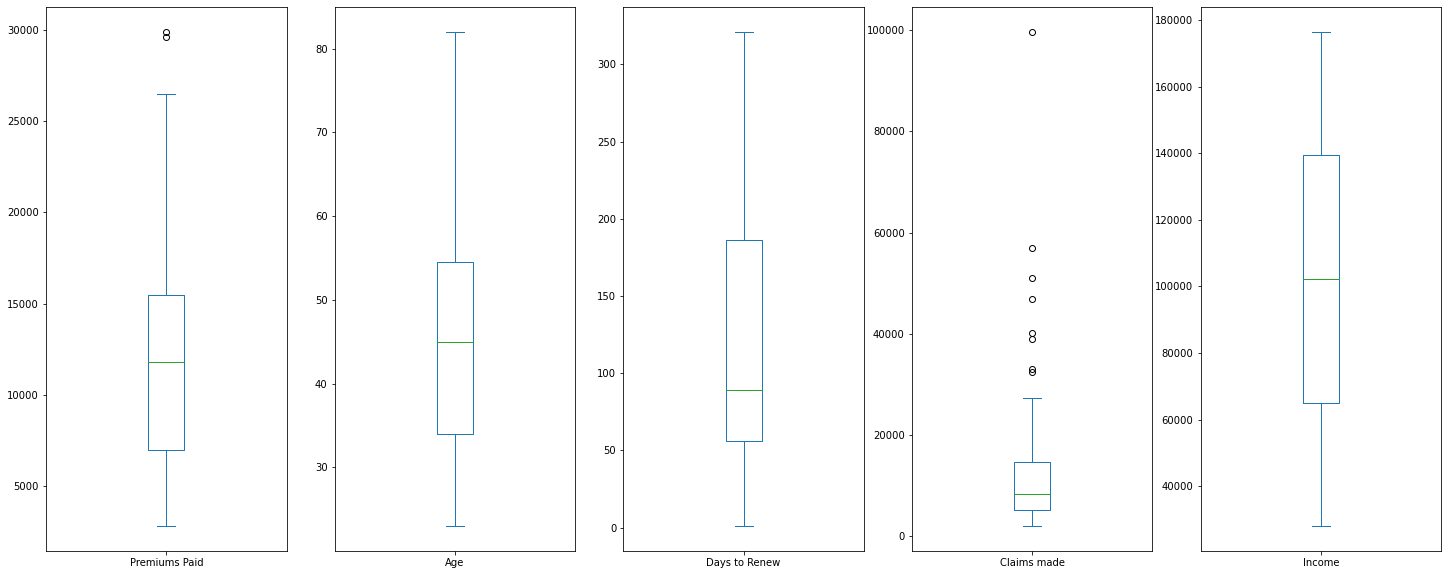

In [11]:
insurance.plot(kind = 'box', subplots = True, figsize = (25,10))
plt.show()

In [12]:
#our target column is claims maid

In [13]:
Insurance_df = insurance.copy()

In [14]:
from sklearn.preprocessing import Normalizer
Normalize = Normalizer(norm='l2')

In [15]:
Insurance_df = Normalize.fit_transform(Insurance_df)

In [16]:
Normalize.n_features_in_

5

In [17]:
Insurance_df

array([[9.85629791e-02, 9.15227663e-04, 8.20184790e-03, 1.36934826e-01,
        9.85629791e-01],
       [9.92060739e-02, 9.07987795e-04, 4.37179309e-03, 7.71602797e-02,
        9.92060739e-01],
       [9.91672101e-02, 8.95703833e-04, 4.60647685e-03, 8.20383283e-02,
        9.91672101e-01],
       [9.93214712e-02, 9.16813581e-04, 1.98642942e-03, 6.04565477e-02,
        9.93214712e-01],
       [9.93319870e-02, 9.34889290e-04, 1.63605626e-03, 5.86961742e-02,
        9.93319870e-01],
       [9.92883059e-02, 9.78898790e-04, 2.48919978e-03, 6.57108060e-02,
        9.92883059e-01],
       [9.92786015e-02, 1.18061040e-03, 2.54904517e-03, 6.71699088e-02,
        9.92786015e-01],
       [9.93405756e-02, 1.16112361e-03, 1.23853185e-03, 5.72151416e-02,
        9.93405756e-01],
       [9.93073402e-02, 1.14203441e-03, 1.88683946e-03, 6.27567219e-02,
        9.93073402e-01],
       [1.46368625e-01, 1.31672979e-03, 4.70260641e-03, 1.62433474e-01,
        9.75790830e-01],
       [1.46081736e-01, 1.5174

In [18]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

In [19]:
from sklearn.decomposition import PCA
pca_norm = PCA(random_state=10, n_components=0.95)
Insurance_Norm_df = pca_norm.fit_transform(Insurance_df)

In [20]:
pca_norm.singular_values_

array([0.89257076, 0.2456283 ])

In [21]:
cumvar = np.cumsum(pca_norm.explained_variance_ratio_*100)

In [22]:
cumvar

array([92.3314859 , 99.32380609])

by applying PCA on standardized data with 95% variance it gives 2 PC out of 5 components

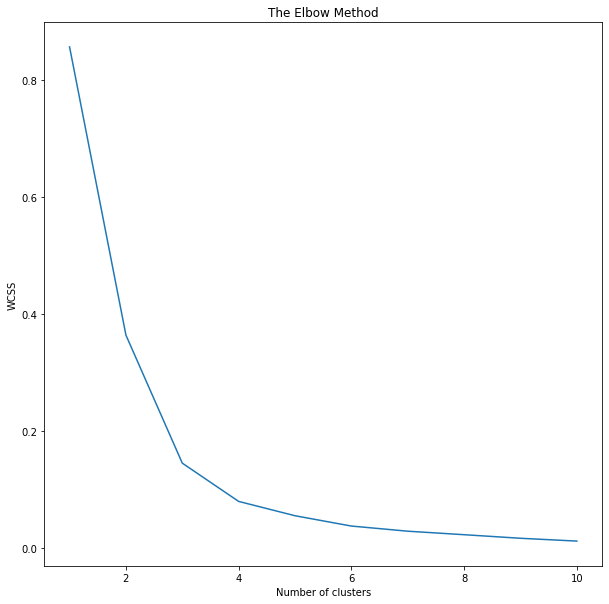

In [23]:
from sklearn.cluster import KMeans
plt.figure(figsize=(10,10))
WCSS = [] #Within cluster sum of squares

for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    Kmeans.fit(Insurance_Norm_df)
    WCSS.append(Kmeans.inertia_)
    
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(Insurance_Norm_df)
    sil_score1= silhouette_score(Insurance_Norm_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.6797024939450184
For n_clusters = 3 The average silhouette_score is : 0.6275686582489488
For n_clusters = 4 The average silhouette_score is : 0.6435499846802797
For n_clusters = 5 The average silhouette_score is : 0.6701360822803025
For n_clusters = 6 The average silhouette_score is : 0.6739485456799624


silhouette_score is optimum at n_clust = 5

In [25]:
Kmeans = KMeans(n_clusters=5,max_iter=500, n_init=30)

In [26]:
model2 = KMeans(n_clusters=5,random_state=10)

In [27]:
model3 = KMeans(random_state=10, max_iter=500, n_init=30)

In [28]:
Kmeans.fit(Insurance_Norm_df)

KMeans(max_iter=500, n_clusters=5, n_init=30)

In [29]:
KMeans_df = pd.DataFrame(Kmeans.labels_, columns=['Clusters'])

In [30]:
KMeans_df

,Clusters
0,4
1,3
2,3
3,3
4,3
...,...
95,1
96,4
97,4
98,2


In [31]:
insurance = pd.concat([insurance,KMeans_df],axis=1)

In [32]:
insurance

,Premiums Paid,Age,Days to Renew,Claims made,Income,Clusters
0,2800,26,233,3890.076336,28000,4
1,2950,27,130,2294.444444,29500,3
2,3100,28,144,2564.545455,31000,3
3,3250,30,65,1978.260870,32500,3
4,3400,32,56,2009.090909,34000,3
...,...,...,...,...,...,...
95,25575,63,76,16161.979170,170500,1
96,25800,62,166,23715.151520,172000,4
97,26025,59,167,24043.401020,173500,4
98,26250,58,245,40147.058820,175000,2


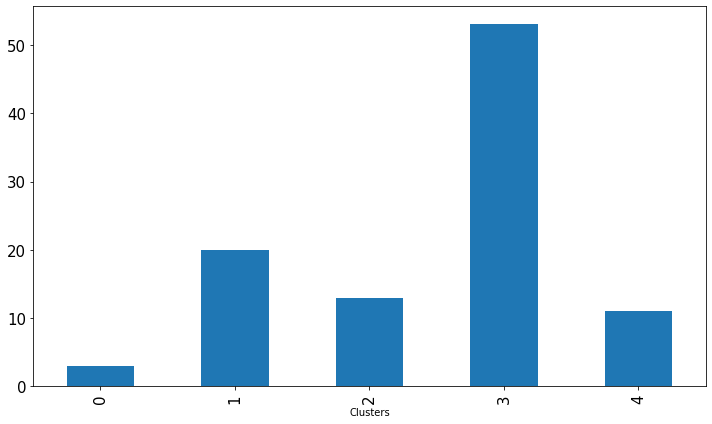

In [34]:
fig,ax = plt.subplots(figsize = (10,6))
insurance.groupby(['Clusters']).count()['Claims made'].plot(kind = 'bar')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
#we can see cluster no 2 is dominant here so client need to more focus on cluster 2

In [35]:
insurance[insurance['Clusters']==2 ].head()

,Premiums Paid,Age,Days to Renew,Claims made,Income,Clusters
11,6675,69,245,10208.82353,44500,2
12,6900,70,261,12192.23301,46000,2
13,4750,34,278,10052.32558,47500,2
32,11400,56,234,15960.00000,76000,2
33,11625,67,256,19590.27778,77500,2


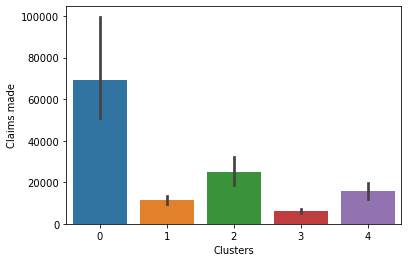

In [36]:
sns.barplot(data=insurance,x='Clusters',y='Claims made',color=plt.jet())
plt.show()

Though cluster 2 is dominant is dataset but totla claims made by cluter 1

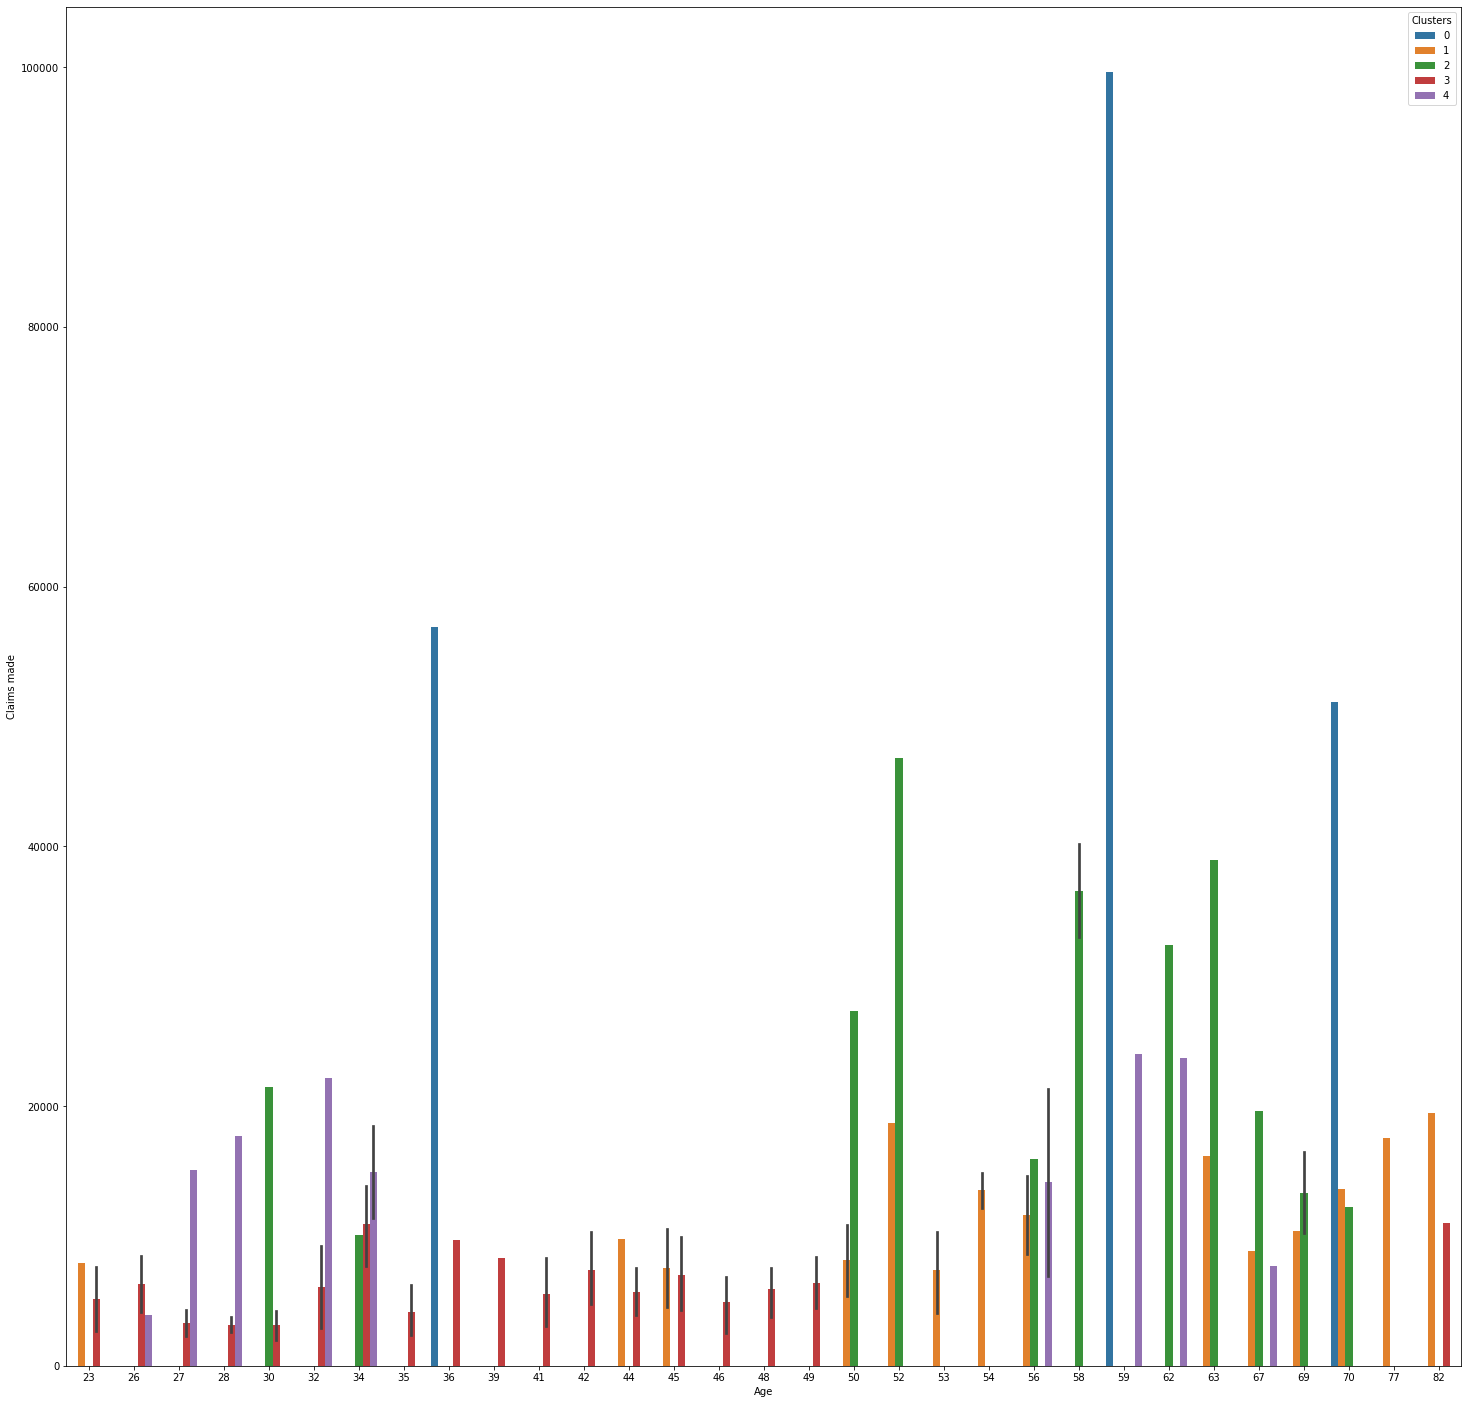

In [40]:
plt.figure(figsize=(25,25))
sns.barplot(data=insurance,y='Claims made',x='Age',color=plt.jet(),hue="Clusters")
plt.show()